<a href="https://colab.research.google.com/github/BossDevinator/IS_4487/blob/main/Labs/Scripts/lab7_retailer_eda2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IS 4487 Lab 7

## Outline

Begin where you left on in Lab 6 with the *SuperStore Retail Orders* dataset

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/Scripts/lab7_retailer_eda2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Superstore Data Dictionary

 ORDER VARIABLES:
 - Order ID
 - Order Date
 - Order Year Month - Year and month of the order
 - Order Type - Was the order completed at a store or online? (Retail, Online)
 - Quantity - Quantity ordered for the product

 CUSTOMER VARIABLES:
 - Customer Name
 - City
 - State Province
 - Email

PRODUCT VARIABLES:
 - Product Name
 - Product Line - Category of the product (i.e. Bikes Phones)
 - Product Price - Price in US Dollars
 - Product Status - Current status of the product (Active, Inactive)

## Load Libraries

➡️ Assignment Tasks
- Load any necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import Data into Dataframe

➡️ Assignment Tasks
- Import data from the SuperStore retail dataset into a dataframe (in GitHub go to Labs > DataSets)
- Describe or profile the dataframe

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Stan-Pugsley/is_4487_base/refs/heads/main/Labs/DataSets/superstore_retail_orders.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56043 entries, 0 to 56042
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          56043 non-null  int64  
 1   order_date        56011 non-null  object 
 2   order_year_month  56011 non-null  object 
 3   customer_name     56043 non-null  object 
 4   city              55569 non-null  object 
 5   state_province    55569 non-null  object 
 6   email             56043 non-null  object 
 7   order_type        56043 non-null  object 
 8   quantity          56004 non-null  float64
 9   product_name      56043 non-null  object 
 10  product_line      56043 non-null  object 
 11  product_price     56043 non-null  float64
 12  product_status    56043 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 5.6+ MB


In [4]:
df.shape

(56043, 13)

In [5]:
df.columns

Index(['order_id', 'order_date', 'order_year_month', 'customer_name', 'city',
       'state_province', 'email', 'order_type', 'quantity', 'product_name',
       'product_line', 'product_price', 'product_status'],
      dtype='object')

In [6]:
df.head(5)

,order_id,order_date,order_year_month,customer_name,city,state_province,email,order_type,quantity,product_name,product_line,product_price,product_status
0,51188,2023-07-01,2023-07,Audrey Blanco,North Cherylmouth,New Hampshire,audrey_blanco@email.com,Retail,3.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active
1,51187,2023-07-01,2023-07,Isaac Allen,Traceyland,West Virginia,isaac_allen@email.com,Online,4.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active
2,51199,2023-07-02,2023-07,Ian Morgan,Dylanberg,South Dakota,ian_morgan@email.com,Online,5.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active
3,51241,2023-07-04,2023-07,Alexa Bell,Lake Tracytown,Wisconsin,alexa_bell@email.com,Online,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active
4,51297,2023-07-08,2023-07,Casey Diaz,Byrdchester,Mississippi,casey_diaz@email.com,Online,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active


## Prepare Data

➡️ Assignment Tasks
- Convert any numbers into the correct datatype if they are not already numeric
- Convert any character variables in to factors if they are appropriate for that datatype
- Check for outliers.   Remove any outliers that appear to be mistakes
- Remove rows with empty (NULL) values
- Identify at least one variable with a missing value that can be imputed.   Fill in those empty values.
- Add a "total_amount" variable based on the quantity and price

In [7]:
#data preparation

In [8]:
df.dtypes

,0
order_id,int64
order_date,object
order_year_month,object
customer_name,object
city,object
state_province,object
email,object
order_type,object
quantity,float64
product_name,object


In [9]:
df = df.dropna()

In [10]:
df['quantity'] = df['quantity'].astype('int')
df.dtypes

<ipython-input-10-726c2b672fb7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['quantity'] = df['quantity'].astype('int')


,0
order_id,int64
order_date,object
order_year_month,object
customer_name,object
city,object
state_province,object
email,object
order_type,object
quantity,int64
product_name,object


In [11]:
#outlier check and cleanup

In [12]:
potential_outlier = df['quantity'] <= 0
df[potential_outlier]

,order_id,order_date,order_year_month,customer_name,city,state_province,email,order_type,quantity,product_name,product_line,product_price,product_status


In [13]:
potential_date_outlier = df['order_date'].str.contains("192")
df[potential_date_outlier]

,order_id,order_date,order_year_month,customer_name,city,state_province,email,order_type,quantity,product_name,product_line,product_price,product_status
1566,73958,1922-06-28,1922-06,Julie Pal,West Davidville,South Carolina,julie_pal@email.com,Retail,1,"Mountain-500 Silver, 40",Bikes,564.99,Active
2098,73995,1922-06-28,1922-06,Jonathan Yang,South James,North Dakota,jonathan_yang@email.com,Retail,1,"Mountain-400-W Silver, 38",Cameras,769.49,Active
3866,74002,1922-06-28,1922-06,Kevin Coleman,Port Bradleyborough,New Mexico,kevin_coleman@email.com,Retail,1,"Touring-1000 Blue, 60",Bikes,2384.07,Active
5068,74006,1922-06-28,1922-06,Kaitlyn Lewis,Port Samuelborough,Hawaii,kaitlyn_lewis@email.com,Retail,1,"Touring-1000 Yellow, 54",Bikes,2384.07,Active
5382,74007,1922-06-28,1922-06,Jesse Turner,New Danielchester,Rhode Island,jesse_turner@email.com,Retail,1,"Touring-1000 Yellow, 46",Bikes,2384.07,Active
7976,74011,1922-06-28,1922-06,Jenny Goel,East Adam,Wisconsin,jenny_goel@email.com,Retail,2,LG 108 cm (43 inches) 4K Ultra HD Smart LED TV...,Electronics,609.63,Active
7977,73978,1922-06-28,1922-06,Karen Zhang,Lake Sierrashire,California,karen_zhang@email.com,Retail,2,LG 108 cm (43 inches) 4K Ultra HD Smart LED TV...,Electronics,609.63,Active
10237,73993,1922-06-28,1922-06,Hunter Lewis,Danielview,New York,hunter_lewis@email.com,Retail,1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,Electronics,926.71,Active
11303,73965,1922-06-28,1922-06,Jonathan Alexander,Davisland,West Virginia,jonathan_alexander@email.com,Retail,2,Redmi 126 cm (50 inches) 4K Ultra HD Android S...,Electronics,548.77,Active
12092,73942,1922-06-28,1922-06,Leslie Moreno,East David,Illinois,leslie_moreno@email.com,Retail,2,Kodak 139 cm (55 inches) 4K Ultra HD Smart LED...,Electronics,621.94,Active


In [14]:
df = df.drop(index=df[potential_date_outlier].index)

In [15]:
df['order_date'].str.contains("192")
df[potential_date_outlier]

<ipython-input-15-4bd5c0b91862>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[potential_date_outlier]


,order_id,order_date,order_year_month,customer_name,city,state_province,email,order_type,quantity,product_name,product_line,product_price,product_status


In [16]:
#impute values

In [17]:
df['total_amount'] = df['product_price'] * df['quantity']
df.head(5)

,order_id,order_date,order_year_month,customer_name,city,state_province,email,order_type,quantity,product_name,product_line,product_price,product_status,total_amount
0,51188,2023-07-01,2023-07,Audrey Blanco,North Cherylmouth,New Hampshire,audrey_blanco@email.com,Retail,3,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active,1949.97
1,51187,2023-07-01,2023-07,Isaac Allen,Traceyland,West Virginia,isaac_allen@email.com,Online,4,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active,2599.96
2,51199,2023-07-02,2023-07,Ian Morgan,Dylanberg,South Dakota,ian_morgan@email.com,Online,5,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active,3249.95
3,51241,2023-07-04,2023-07,Alexa Bell,Lake Tracytown,Wisconsin,alexa_bell@email.com,Online,1,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active,649.99
4,51297,2023-07-08,2023-07,Casey Diaz,Byrdchester,Mississippi,casey_diaz@email.com,Online,1,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active,649.99


In [18]:
potential_date_outlier_2 = df['order_date'].str.contains("2029")
df[potential_date_outlier_2]

,order_id,order_date,order_year_month,customer_name,city,state_province,email,order_type,quantity,product_name,product_line,product_price,product_status,total_amount
737,74147,2029-07-20,2029-07,Gabriel Lal,Brownville,Maine,gabriel_lal@email.com,Online,1,"Road-750 Black, 48",Bikes,539.99,Active,539.99
1093,74141,2029-07-18,2029-07,Ethan Ross,Brownshire,South Carolina,ethan_ross@email.com,Online,1,"Road-750 Black, 44",Bikes,539.99,Active,539.99
2199,74135,2029-07-19,2029-07,Fernando Butler,Gayburgh,Arizona,fernando_butler@email.com,Online,1,"Touring-3000 Blue, 44",Cameras,742.35,Active,742.35
3523,74138,2029-07-14,2029-07,Devon Pal,Batesmouth,Mississippi,devon_pal@email.com,Retail,1,"APPLE iPhone 15 Pro Max (Purple, 256 GB)",Mobile,1199.00,Active,1199.00
4172,74144,2029-07-29,2029-07,Jill Suarez,New Debra,Texas,jill_suarez@email.com,Retail,1,"Touring-1000 Blue, 50",Bikes,2384.07,Active,2384.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52000,74101,2029-07-21,2029-07,Gilbert Kumar,Jonesberg,New Hampshire,gilbert_kumar@email.com,Online,1,Acer 139 cm (55 inches) H Series 4K Ultra HD A...,Electronics,609.63,Active,609.63
52001,74129,2029-07-25,2029-07,Jeremiah Jackson,Lake Ashleystad,Connecticut,jeremiah_jackson@email.com,Online,1,Acer 139 cm (55 inches) H Series 4K Ultra HD A...,Electronics,609.63,Active,609.63
52002,74144,2029-07-29,2029-07,Jill Suarez,New Debra,Texas,jill_suarez@email.com,Retail,1,Acer 139 cm (55 inches) H Series 4K Ultra HD A...,Electronics,609.63,Active,609.63
53940,74136,2029-07-03,2029-07,Alejandro Kumar,Lake Greg,West Virginia,alejandro_kumar@email.com,Retail,1,"OnePlus 10R 5G (Forest Green, 8GB RAM, 128GB S...",Electronics,475.60,Active,475.60


In [19]:
df = df.drop(index=df[potential_date_outlier_2].index)

df['order_date'].str.contains("2029")
df[potential_date_outlier_2]

<ipython-input-19-99976a5a58f4>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[potential_date_outlier_2]


,order_id,order_date,order_year_month,customer_name,city,state_province,email,order_type,quantity,product_name,product_line,product_price,product_status,total_amount


In [20]:
potential_outlier = df['total_amount'] >= 1000000
df[potential_outlier]

,order_id,order_date,order_year_month,customer_name,city,state_province,email,order_type,quantity,product_name,product_line,product_price,product_status,total_amount
44626,45087,2022-01-03,2022-01,Joseph Martin,Rogersborough,Nevada,joseph_martin@email.com,Retail,600,"Projector Black, 44",Projector,3374.99,Active,2024994.0
45857,45085,2022-01-02,2022-01,Reginald Alvarez,Lake Kellyland,Washington,reginald_alvarez@email.com,Retail,500,Gaming Laptop Silver,Laptop,3578.27,Active,1789135.0
55308,66470,2024-03-19,2024-03,Lisa Wang,Baileychester,South Dakota,lisa_wang@email.com,Retail,2000,"Samsung Galaxy S20 FE 5G (Cloud Navy, 8GB RAM,...",Electronics,914.62,Active,1829240.0


## Prepare Data - Continued

➡️ Assignment Tasks
- Create a variable called "complete_customer_info".   Use "1" for True and "2" for False.  All customer fields must be valid and not empty before this variable is True.
- Create a bar chart showing the count of customers with complete informaiton versus incomplete information

In [21]:
#create variable

In [22]:
df['complete_customer_info'] = (
    (df['customer_name'].notna()) &
    (df['city'].notna()) &
    (df['state_province'].notna()) &
    (df['email'].notna())
).astype(int) + 1

df['complete_customer_info']

,complete_customer_info
0,2
1,2
2,2
3,2
4,2
...,...
56038,2
56039,2
56040,2
56041,2


In [23]:
#create chart

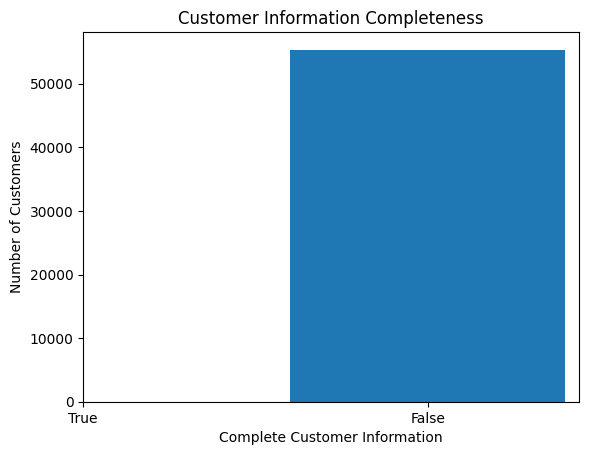

In [24]:
customer_info_counts = df['complete_customer_info'].value_counts()
plt.bar(customer_info_counts.index, customer_info_counts.values)
plt.xlabel('Complete Customer Information')
plt.ylabel('Number of Customers')
plt.title('Customer Information Completeness')
plt.xticks([1, 2], ['True', 'False'])
plt.show()


## Prepare Data - Continued

➡️ Assignment Tasks
- Create seasonal buckets for Winter, Sprint, Summer, Fall
- Create a chart to show revenue by season
- Create a chart to show revenue by year

In [25]:
#seasonality

In [26]:
def assign_season(month):
  if month in [12, 1, 2]:
    return 'Winter'
  elif month in [3, 4, 5]:
    return 'Spring'
  elif month in [6, 7, 8]:
    return 'Summer'
  else:
    return 'Fall'

In [27]:
#revenue over time

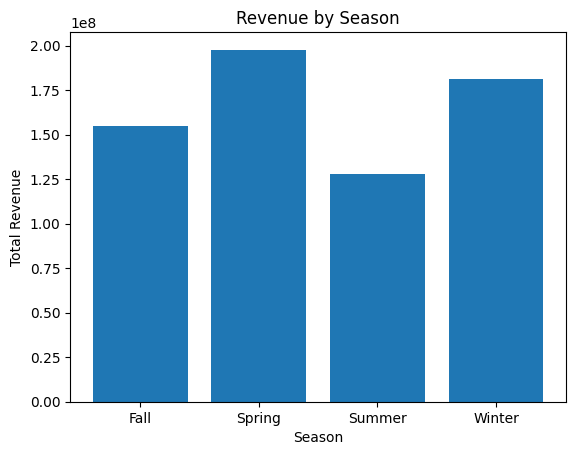

In [28]:
df['order_month'] = pd.to_datetime(df['order_date'], errors='coerce').dt.month

df['season'] = df['order_month'].apply(assign_season)

seasonal_revenue = df.groupby('season')['total_amount'].sum()

plt.bar(seasonal_revenue.index, seasonal_revenue.values)
plt.xlabel('Season')
plt.ylabel('Total Revenue')
plt.title('Revenue by Season')
plt.show()

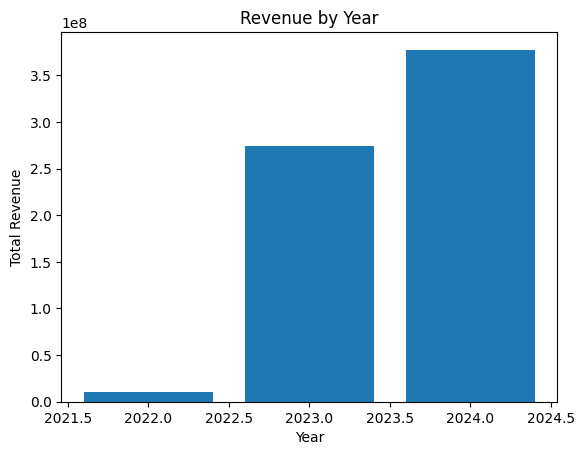

In [29]:
df['year'] = pd.to_datetime(df['order_date'], errors='coerce').dt.year

yearly_revenue = df.groupby('year')['total_amount'].sum()

plt.bar(yearly_revenue.index, yearly_revenue.values)
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.title('Revenue by Year')
plt.show()

## Prepare Data - Continued

➡️ Assignment Tasks
- Create a variable that will group product lines into "Outdoor" versus "Indoor" products.
- Create a plot to show the correlation between outdoor/indoor versus season  

In [30]:
#indoor/outdoor variable

In [31]:
def categorize_product_line(product_line):
  if product_line in ['Bikes', 'Camping Equipment']:
    return 'Outdoor'
  else:
    return 'Indoor'

df['product_category'] = df['product_line'].apply(categorize_product_line)

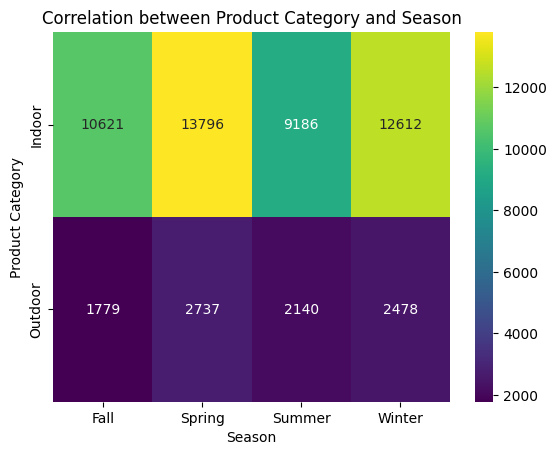

In [32]:
product_season_counts = pd.crosstab(df['product_category'], df['season'])

sns.heatmap(product_season_counts, annot=True, fmt='d', cmap='viridis')
plt.title('Correlation between Product Category and Season')
plt.xlabel('Season')
plt.ylabel('Product Category')
plt.show()